In [ ]:
# This notebook checks two claims via simulation:


# null HP: the two distributions are the same
# H1: the two distributions are different

# p-value = P(reject null HP | null HP is true) = error 1 type
# power = P(reject null HP | H1 is true) = correct in finding a divergence.

# 1. reteaded trials vs increase sample size. 
# What is better to have a more powerful test (detect a divergence with a good probability)? 

In [ ]:
# 2. Given the statement of Michael: 
# If the probability of finding a bug (divergent case) in general is small = P(divergent case).
# Probability of reproducing a known bug = P(reproduce a known bug)
# The probability of triggering a specific bug with a divergent case overall is very low.

# software S
# B = bugs in the software (ideally)
# |B| = # total bugs
# T = all possible unique tests which we can ever create for the software S
# |T| = # total trigger
# P(create a program that triggers at least one bug)
# P(create a program that triggers a specific bug)


# Compute and observe how the various probailities depend on each other.

In [14]:
# ASSUMPTIONS
# - each test triggers only one bug.
# - each bug can be triggered by only one test.
# - our language has a muximum nuber of statement (bounded by memory)
# - each statement can be chosen among a finite number of options
# - each statement is a constant statement (no prarmetrizable statements)
# - the program does not have any input value


#software S
tot_LoC_of_software = 10000
bugs_per_1000_lines = 35
# https://softwareengineering.stackexchange.com/a/185684
# Industry Average: "about 15 - 50 errors per 1000 lines of delivered code."
# (Steve) further says this is usually representative of code that has some 
# level of structured programming behind it, but probably includes a mix 
# of coding techniques.
# B = bugs in the software (ideally)
# |B| = # total bugs
n_total_bugs = int((tot_LoC_of_software/1000) * bugs_per_1000_lines)
print(f"n_total_bugs: {n_total_bugs}")

# T = all possible unique tests which we can ever create for the software S
# |T| = # total trigger
maximum_statements_per_test = 30
possible_statements = 5
n_total_test = sum([
    possible_statements**i_tot_statement 
    for i_tot_statement in range(maximum_statements_per_test)
])
print(f"n_total_test: {n_total_test}")
# A = bugs that we are aware of 
# A contained in B
fraction_of_known_bugs = .05
n_known_bugs = n_total_bugs * fraction_of_known_bugs

# ----------------------------------------------------------------------------
# EXTENSION
# - a single bug can be triggered in many ways: we just need to have that 
# a specific sequence in that order
bug_length_in_statements = 6
n_test_variant_triggering_same_bug = sum([
    (possible_statements**i_tot_statement_left )* (i_tot_statement_left - 1)
    for i_tot_statement_left in range(maximum_statements_per_test-bug_length_in_statements)
])
# +1 because once we have 
# possible_statements**(i_tot_statement-bug_length_in_statements)
# bacuse if the program is 20 lines long and the bug 6 lines, we can choose 
# for 14 lines among 5 statements
# the +1 comes from the fact that the bug can be at any position in the 14 lines
# so the previously computed value has to be multiplied for 14 -1 = 13 
print(f"n_test_variant_triggering_same_bug: {n_test_variant_triggering_same_bug}")


# ASSUMPTION: the test creation is purely random. When creating a new test we 
# sample one of all the possible test, and check if that is a bug or not.


# P(create a test program that triggers a specific bug)
# equal to the probability of fuzzing that one test which triggers the bug
P_find_a_specific_bug = n_test_variant_triggering_same_bug / n_total_test
print(f"P_find_a_specific_bug (one trial): {P_find_a_specific_bug}")

# P(create a program that triggers at least one bug)
P_at_least_one = sum([
    P_find_a_specific_bug
    for _ in range(n_total_bugs)
] )
print(f"P_at_least_one: {P_at_least_one}")

# P(create a test program that triggers a specific bug in a specific )

n_total_bugs: 350
n_total_test: 232830643653869628906
n_test_variant_triggering_same_bug: 324100255966186524
P_find_a_specific_bug (one trial): 0.001392
P_at_least_one: 0.48720000000000124


In [2]:

P_at_least_one_bis = (n_test_variant_triggering_same_bug * n_total_bugs) / n_total_test
print(f"P_at_least_one_bis: {P_at_least_one_bis}")

P_at_least_one_bis: 0.4872


In [3]:

# total test that we can fuzz in a fuzzing session with limited time
test_per_minute = 60 * 100
hours_of_fuzzing = 90
n_fuzzed_test = test_per_minute * 60 * hours_of_fuzzing
print(f"n_fuzzed_test: {n_fuzzed_test}")

n_fuzzed_test: 32400000


In [12]:
import numpy as np
import pdb

trial_results = []

available_bugs = n_total_bugs

for i in range(n_fuzzed_test):
    print(i)
    P_at_least_one_bis = (n_test_variant_triggering_same_bug * available_bugs) / n_total_test
    if P_at_least_one_bis < 0:
        pdb.set_trace()
    print(f"P_at_least_one_bis: {P_at_least_one_bis}")
    trial_result = np.random.choice([1,0], 1, p=[P_at_least_one_bis, 1 - P_at_least_one_bis])
    print(f"trial_result: {trial_result}")
    print(f"available_bugs: {available_bugs}")
    available_bugs -= int(trial_result[0])
    if available_bugs == 0:
        break
    trial_results.append(trial_result)

n_bugs_found = sum(trial_results)
print(f"n_bugs_found: {n_bugs_found}")

0
P_at_least_one_bis: 0.4872
trial_result: [0]
available_bugs: 350
1
P_at_least_one_bis: 0.4872
trial_result: [0]
available_bugs: 350
2
P_at_least_one_bis: 0.4872
trial_result: [0]
available_bugs: 350
3
P_at_least_one_bis: 0.4872
trial_result: [0]
available_bugs: 350
4
P_at_least_one_bis: 0.4872
trial_result: [1]
available_bugs: 350
5
P_at_least_one_bis: 0.485808
trial_result: [1]
available_bugs: 349
6
P_at_least_one_bis: 0.484416
trial_result: [0]
available_bugs: 348
7
P_at_least_one_bis: 0.484416
trial_result: [0]
available_bugs: 348
8
P_at_least_one_bis: 0.484416
trial_result: [0]
available_bugs: 348
9
P_at_least_one_bis: 0.484416
trial_result: [0]
available_bugs: 348
10
P_at_least_one_bis: 0.484416
trial_result: [0]
available_bugs: 348
11
P_at_least_one_bis: 0.484416
trial_result: [0]
available_bugs: 348
12
P_at_least_one_bis: 0.484416
trial_result: [1]
available_bugs: 348
13
P_at_least_one_bis: 0.483024
trial_result: [0]
available_bugs: 347
14
P_at_least_one_bis: 0.483024
trial_re

available_bugs: 201
375
P_at_least_one_bis: 0.279792
trial_result: [0]
available_bugs: 201
376
P_at_least_one_bis: 0.279792
trial_result: [0]
available_bugs: 201
377
P_at_least_one_bis: 0.279792
trial_result: [0]
available_bugs: 201
378
P_at_least_one_bis: 0.279792
trial_result: [1]
available_bugs: 201
379
P_at_least_one_bis: 0.2784
trial_result: [0]
available_bugs: 200
380
P_at_least_one_bis: 0.2784
trial_result: [0]
available_bugs: 200
381
P_at_least_one_bis: 0.2784
trial_result: [0]
available_bugs: 200
382
P_at_least_one_bis: 0.2784
trial_result: [0]
available_bugs: 200
383
P_at_least_one_bis: 0.2784
trial_result: [0]
available_bugs: 200
384
P_at_least_one_bis: 0.2784
trial_result: [0]
available_bugs: 200
385
P_at_least_one_bis: 0.2784
trial_result: [0]
available_bugs: 200
386
P_at_least_one_bis: 0.2784
trial_result: [0]
available_bugs: 200
387
P_at_least_one_bis: 0.2784
trial_result: [1]
available_bugs: 200
388
P_at_least_one_bis: 0.277008
trial_result: [1]
available_bugs: 199
389


trial_result: [0]
available_bugs: 122
725
P_at_least_one_bis: 0.169824
trial_result: [0]
available_bugs: 122
726
P_at_least_one_bis: 0.169824
trial_result: [0]
available_bugs: 122
727
P_at_least_one_bis: 0.169824
trial_result: [0]
available_bugs: 122
728
P_at_least_one_bis: 0.169824
trial_result: [0]
available_bugs: 122
729
P_at_least_one_bis: 0.169824
trial_result: [0]
available_bugs: 122
730
P_at_least_one_bis: 0.169824
trial_result: [0]
available_bugs: 122
731
P_at_least_one_bis: 0.169824
trial_result: [0]
available_bugs: 122
732
P_at_least_one_bis: 0.169824
trial_result: [0]
available_bugs: 122
733
P_at_least_one_bis: 0.169824
trial_result: [0]
available_bugs: 122
734
P_at_least_one_bis: 0.169824
trial_result: [0]
available_bugs: 122
735
P_at_least_one_bis: 0.169824
trial_result: [0]
available_bugs: 122
736
P_at_least_one_bis: 0.169824
trial_result: [0]
available_bugs: 122
737
P_at_least_one_bis: 0.169824
trial_result: [1]
available_bugs: 122
738
P_at_least_one_bis: 0.168432
trial_

trial_result: [0]
available_bugs: 74
1057
P_at_least_one_bis: 0.103008
trial_result: [0]
available_bugs: 74
1058
P_at_least_one_bis: 0.103008
trial_result: [0]
available_bugs: 74
1059
P_at_least_one_bis: 0.103008
trial_result: [0]
available_bugs: 74
1060
P_at_least_one_bis: 0.103008
trial_result: [0]
available_bugs: 74
1061
P_at_least_one_bis: 0.103008
trial_result: [0]
available_bugs: 74
1062
P_at_least_one_bis: 0.103008
trial_result: [0]
available_bugs: 74
1063
P_at_least_one_bis: 0.103008
trial_result: [0]
available_bugs: 74
1064
P_at_least_one_bis: 0.103008
trial_result: [0]
available_bugs: 74
1065
P_at_least_one_bis: 0.103008
trial_result: [0]
available_bugs: 74
1066
P_at_least_one_bis: 0.103008
trial_result: [0]
available_bugs: 74
1067
P_at_least_one_bis: 0.103008
trial_result: [0]
available_bugs: 74
1068
P_at_least_one_bis: 0.103008
trial_result: [0]
available_bugs: 74
1069
P_at_least_one_bis: 0.103008
trial_result: [0]
available_bugs: 74
1070
P_at_least_one_bis: 0.103008
trial_

trial_result: [0]
available_bugs: 38
1471
P_at_least_one_bis: 0.052896
trial_result: [0]
available_bugs: 38
1472
P_at_least_one_bis: 0.052896
trial_result: [0]
available_bugs: 38
1473
P_at_least_one_bis: 0.052896
trial_result: [0]
available_bugs: 38
1474
P_at_least_one_bis: 0.052896
trial_result: [0]
available_bugs: 38
1475
P_at_least_one_bis: 0.052896
trial_result: [0]
available_bugs: 38
1476
P_at_least_one_bis: 0.052896
trial_result: [0]
available_bugs: 38
1477
P_at_least_one_bis: 0.052896
trial_result: [0]
available_bugs: 38
1478
P_at_least_one_bis: 0.052896
trial_result: [0]
available_bugs: 38
1479
P_at_least_one_bis: 0.052896
trial_result: [0]
available_bugs: 38
1480
P_at_least_one_bis: 0.052896
trial_result: [0]
available_bugs: 38
1481
P_at_least_one_bis: 0.052896
trial_result: [0]
available_bugs: 38
1482
P_at_least_one_bis: 0.052896
trial_result: [1]
available_bugs: 38
1483
P_at_least_one_bis: 0.051504
trial_result: [0]
available_bugs: 37
1484
P_at_least_one_bis: 0.051504
trial_

trial_result: [0]
available_bugs: 22
1838
P_at_least_one_bis: 0.030624
trial_result: [0]
available_bugs: 22
1839
P_at_least_one_bis: 0.030624
trial_result: [0]
available_bugs: 22
1840
P_at_least_one_bis: 0.030624
trial_result: [0]
available_bugs: 22
1841
P_at_least_one_bis: 0.030624
trial_result: [1]
available_bugs: 22
1842
P_at_least_one_bis: 0.029232
trial_result: [0]
available_bugs: 21
1843
P_at_least_one_bis: 0.029232
trial_result: [0]
available_bugs: 21
1844
P_at_least_one_bis: 0.029232
trial_result: [0]
available_bugs: 21
1845
P_at_least_one_bis: 0.029232
trial_result: [0]
available_bugs: 21
1846
P_at_least_one_bis: 0.029232
trial_result: [0]
available_bugs: 21
1847
P_at_least_one_bis: 0.029232
trial_result: [0]
available_bugs: 21
1848
P_at_least_one_bis: 0.029232
trial_result: [0]
available_bugs: 21
1849
P_at_least_one_bis: 0.029232
trial_result: [0]
available_bugs: 21
1850
P_at_least_one_bis: 0.029232
trial_result: [0]
available_bugs: 21
1851
P_at_least_one_bis: 0.029232
trial_

trial_result: [0]
available_bugs: 12
2200
P_at_least_one_bis: 0.016704
trial_result: [0]
available_bugs: 12
2201
P_at_least_one_bis: 0.016704
trial_result: [0]
available_bugs: 12
2202
P_at_least_one_bis: 0.016704
trial_result: [0]
available_bugs: 12
2203
P_at_least_one_bis: 0.016704
trial_result: [0]
available_bugs: 12
2204
P_at_least_one_bis: 0.016704
trial_result: [0]
available_bugs: 12
2205
P_at_least_one_bis: 0.016704
trial_result: [0]
available_bugs: 12
2206
P_at_least_one_bis: 0.016704
trial_result: [0]
available_bugs: 12
2207
P_at_least_one_bis: 0.016704
trial_result: [0]
available_bugs: 12
2208
P_at_least_one_bis: 0.016704
trial_result: [0]
available_bugs: 12
2209
P_at_least_one_bis: 0.016704
trial_result: [0]
available_bugs: 12
2210
P_at_least_one_bis: 0.016704
trial_result: [0]
available_bugs: 12
2211
P_at_least_one_bis: 0.016704
trial_result: [0]
available_bugs: 12
2212
P_at_least_one_bis: 0.016704
trial_result: [0]
available_bugs: 12
2213
P_at_least_one_bis: 0.016704
trial_

trial_result: [0]
available_bugs: 7
2572
P_at_least_one_bis: 0.009744
trial_result: [0]
available_bugs: 7
2573
P_at_least_one_bis: 0.009744
trial_result: [0]
available_bugs: 7
2574
P_at_least_one_bis: 0.009744
trial_result: [0]
available_bugs: 7
2575
P_at_least_one_bis: 0.009744
trial_result: [0]
available_bugs: 7
2576
P_at_least_one_bis: 0.009744
trial_result: [0]
available_bugs: 7
2577
P_at_least_one_bis: 0.009744
trial_result: [0]
available_bugs: 7
2578
P_at_least_one_bis: 0.009744
trial_result: [0]
available_bugs: 7
2579
P_at_least_one_bis: 0.009744
trial_result: [0]
available_bugs: 7
2580
P_at_least_one_bis: 0.009744
trial_result: [0]
available_bugs: 7
2581
P_at_least_one_bis: 0.009744
trial_result: [0]
available_bugs: 7
2582
P_at_least_one_bis: 0.009744
trial_result: [0]
available_bugs: 7
2583
P_at_least_one_bis: 0.009744
trial_result: [0]
available_bugs: 7
2584
P_at_least_one_bis: 0.009744
trial_result: [0]
available_bugs: 7
2585
P_at_least_one_bis: 0.009744
trial_result: [0]
av

P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2900
P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2901
P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2902
P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2903
P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2904
P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2905
P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2906
P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2907
P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2908
P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2909
P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2910
P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2911
P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2912
P_at_least_one_bis: 0.004176
trial_result: [0]
available_bugs: 3
2913
P_at_least_one_bis: 

trial_result: [0]
available_bugs: 1
3229
P_at_least_one_bis: 0.001392
trial_result: [0]
available_bugs: 1
3230
P_at_least_one_bis: 0.001392
trial_result: [0]
available_bugs: 1
3231
P_at_least_one_bis: 0.001392
trial_result: [0]
available_bugs: 1
3232
P_at_least_one_bis: 0.001392
trial_result: [0]
available_bugs: 1
3233
P_at_least_one_bis: 0.001392
trial_result: [0]
available_bugs: 1
3234
P_at_least_one_bis: 0.001392
trial_result: [0]
available_bugs: 1
3235
P_at_least_one_bis: 0.001392
trial_result: [0]
available_bugs: 1
3236
P_at_least_one_bis: 0.001392
trial_result: [0]
available_bugs: 1
3237
P_at_least_one_bis: 0.001392
trial_result: [0]
available_bugs: 1
3238
P_at_least_one_bis: 0.001392
trial_result: [0]
available_bugs: 1
3239
P_at_least_one_bis: 0.001392
trial_result: [0]
available_bugs: 1
3240
P_at_least_one_bis: 0.001392
trial_result: [0]
available_bugs: 1
3241
P_at_least_one_bis: 0.001392
trial_result: [0]
available_bugs: 1
3242
P_at_least_one_bis: 0.001392
trial_result: [0]
av

Text(0, 0.5, 'cumulative # bugs discovered')

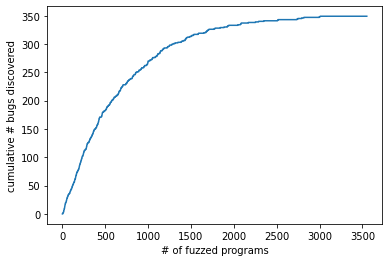

In [13]:
import matplotlib.pyplot as plt

plt.plot(
    np.arange(len(trial_results)),
    np.cumsum(trial_results)
)
plt.xlabel("# of fuzzed programs")
plt.ylabel("cumulative # bugs discovered")

In [46]:
(n_test_variant_triggering_same_bug * 341) / n_total_test

0.474672

In [27]:
import numpy as np

# 1 means bug found
# 0 means bug not found
bug_found_vector = np.random.choice([1,0], n_fuzzed_test, p=[P_at_least_one, 1 - P_at_least_one])
bugs_found = sum(bug_found_vector)
print(f"bugs_found: {bugs_found}")

n_fuzzed_test: 32400000
bugs_found: 0


In [34]:
P_not_finding_any_bug = 1 - P_at_least_one

fixed_n_fuzz_test = 10**15

P_not_finding_any_test_for_the_entire_fuzzing_session = P_not_finding_any_bug ** fixed_n_fuzz_test
print(f"P_not_finding_any_test_for_the_entire_fuzzing_session: {P_not_finding_any_test_for_the_entire_fuzzing_session}")

n_days_needed = fixed_n_fuzz_test / (24 * 60 * test_per_minute)
print(f"To find at least one bug with probability {1-P_not_finding_any_test_for_the_entire_fuzzing_session} we need at least {n_days_needed} days with speed: test_per_minute: {test_per_minute}")

P_not_finding_any_test_for_the_entire_fuzzing_session: 0.32948546950694746
To find at least one bug with probability 0.6705145304930525 we need at least 115740740.74074075 days with speed: test_per_minute: 6000


# MVP

In [20]:
import numpy as np

trial_results = []
INITIAL_AVAILABLE_BUGS = 200
N_TOTAL_TEST = 100000 
N_TEST_BUDGET = 10000
N_VARIANTS_TRIGGERING_ONE_BUG = 5

available_bugs = INITIAL_AVAILABLE_BUGS

for i in range(N_TEST_BUDGET):
    print("STEP - ", i)
    P_at_least_one_bis = (N_VARIANTS_TRIGGERING_ONE_BUG * available_bugs) / N_TOTAL_TEST
    print(f"P_at_least_one_bis: {P_at_least_one_bis}")
    trial_result = np.random.choice([1,0], 1, p=[P_at_least_one_bis, 1 - P_at_least_one_bis])
    print(f"trial_result: {trial_result}")
    print(f"available_bugs: {available_bugs}")
    available_bugs -= int(trial_result[0])
    if available_bugs == 0:
        break
        print("DONE")
    trial_results.append(trial_result)

n_bugs_found = sum(trial_results)
print(f"n_bugs_found: {n_bugs_found}")

STEP -  0
P_at_least_one_bis: 0.01
trial_result: [0]
available_bugs: 200
STEP -  1
P_at_least_one_bis: 0.01
trial_result: [0]
available_bugs: 200
STEP -  2
P_at_least_one_bis: 0.01
trial_result: [0]
available_bugs: 200
STEP -  3
P_at_least_one_bis: 0.01
trial_result: [0]
available_bugs: 200
STEP -  4
P_at_least_one_bis: 0.01
trial_result: [0]
available_bugs: 200
STEP -  5
P_at_least_one_bis: 0.01
trial_result: [0]
available_bugs: 200
STEP -  6
P_at_least_one_bis: 0.01
trial_result: [0]
available_bugs: 200
STEP -  7
P_at_least_one_bis: 0.01
trial_result: [0]
available_bugs: 200
STEP -  8
P_at_least_one_bis: 0.01
trial_result: [0]
available_bugs: 200
STEP -  9
P_at_least_one_bis: 0.01
trial_result: [0]
available_bugs: 200
STEP -  10
P_at_least_one_bis: 0.01
trial_result: [0]
available_bugs: 200
STEP -  11
P_at_least_one_bis: 0.01
trial_result: [0]
available_bugs: 200
STEP -  12
P_at_least_one_bis: 0.01
trial_result: [0]
available_bugs: 200
STEP -  13
P_at_least_one_bis: 0.01
trial_result

trial_result: [0]
available_bugs: 197
STEP -  295
P_at_least_one_bis: 0.00985
trial_result: [0]
available_bugs: 197
STEP -  296
P_at_least_one_bis: 0.00985
trial_result: [0]
available_bugs: 197
STEP -  297
P_at_least_one_bis: 0.00985
trial_result: [0]
available_bugs: 197
STEP -  298
P_at_least_one_bis: 0.00985
trial_result: [0]
available_bugs: 197
STEP -  299
P_at_least_one_bis: 0.00985
trial_result: [0]
available_bugs: 197
STEP -  300
P_at_least_one_bis: 0.00985
trial_result: [0]
available_bugs: 197
STEP -  301
P_at_least_one_bis: 0.00985
trial_result: [0]
available_bugs: 197
STEP -  302
P_at_least_one_bis: 0.00985
trial_result: [0]
available_bugs: 197
STEP -  303
P_at_least_one_bis: 0.00985
trial_result: [0]
available_bugs: 197
STEP -  304
P_at_least_one_bis: 0.00985
trial_result: [0]
available_bugs: 197
STEP -  305
P_at_least_one_bis: 0.00985
trial_result: [0]
available_bugs: 197
STEP -  306
P_at_least_one_bis: 0.00985
trial_result: [0]
available_bugs: 197
STEP -  307
P_at_least_one

trial_result: [0]
available_bugs: 196
STEP -  603
P_at_least_one_bis: 0.0098
trial_result: [0]
available_bugs: 196
STEP -  604
P_at_least_one_bis: 0.0098
trial_result: [0]
available_bugs: 196
STEP -  605
P_at_least_one_bis: 0.0098
trial_result: [0]
available_bugs: 196
STEP -  606
P_at_least_one_bis: 0.0098
trial_result: [0]
available_bugs: 196
STEP -  607
P_at_least_one_bis: 0.0098
trial_result: [0]
available_bugs: 196
STEP -  608
P_at_least_one_bis: 0.0098
trial_result: [0]
available_bugs: 196
STEP -  609
P_at_least_one_bis: 0.0098
trial_result: [0]
available_bugs: 196
STEP -  610
P_at_least_one_bis: 0.0098
trial_result: [0]
available_bugs: 196
STEP -  611
P_at_least_one_bis: 0.0098
trial_result: [0]
available_bugs: 196
STEP -  612
P_at_least_one_bis: 0.0098
trial_result: [0]
available_bugs: 196
STEP -  613
P_at_least_one_bis: 0.0098
trial_result: [0]
available_bugs: 196
STEP -  614
P_at_least_one_bis: 0.0098
trial_result: [0]
available_bugs: 196
STEP -  615
P_at_least_one_bis: 0.0098

trial_result: [1]
available_bugs: 193
STEP -  922
P_at_least_one_bis: 0.0096
trial_result: [0]
available_bugs: 192
STEP -  923
P_at_least_one_bis: 0.0096
trial_result: [0]
available_bugs: 192
STEP -  924
P_at_least_one_bis: 0.0096
trial_result: [0]
available_bugs: 192
STEP -  925
P_at_least_one_bis: 0.0096
trial_result: [0]
available_bugs: 192
STEP -  926
P_at_least_one_bis: 0.0096
trial_result: [0]
available_bugs: 192
STEP -  927
P_at_least_one_bis: 0.0096
trial_result: [0]
available_bugs: 192
STEP -  928
P_at_least_one_bis: 0.0096
trial_result: [0]
available_bugs: 192
STEP -  929
P_at_least_one_bis: 0.0096
trial_result: [0]
available_bugs: 192
STEP -  930
P_at_least_one_bis: 0.0096
trial_result: [0]
available_bugs: 192
STEP -  931
P_at_least_one_bis: 0.0096
trial_result: [0]
available_bugs: 192
STEP -  932
P_at_least_one_bis: 0.0096
trial_result: [0]
available_bugs: 192
STEP -  933
P_at_least_one_bis: 0.0096
trial_result: [0]
available_bugs: 192
STEP -  934
P_at_least_one_bis: 0.0096

trial_result: [0]
available_bugs: 190
STEP -  1226
P_at_least_one_bis: 0.0095
trial_result: [0]
available_bugs: 190
STEP -  1227
P_at_least_one_bis: 0.0095
trial_result: [0]
available_bugs: 190
STEP -  1228
P_at_least_one_bis: 0.0095
trial_result: [0]
available_bugs: 190
STEP -  1229
P_at_least_one_bis: 0.0095
trial_result: [0]
available_bugs: 190
STEP -  1230
P_at_least_one_bis: 0.0095
trial_result: [0]
available_bugs: 190
STEP -  1231
P_at_least_one_bis: 0.0095
trial_result: [0]
available_bugs: 190
STEP -  1232
P_at_least_one_bis: 0.0095
trial_result: [0]
available_bugs: 190
STEP -  1233
P_at_least_one_bis: 0.0095
trial_result: [0]
available_bugs: 190
STEP -  1234
P_at_least_one_bis: 0.0095
trial_result: [0]
available_bugs: 190
STEP -  1235
P_at_least_one_bis: 0.0095
trial_result: [0]
available_bugs: 190
STEP -  1236
P_at_least_one_bis: 0.0095
trial_result: [0]
available_bugs: 190
STEP -  1237
P_at_least_one_bis: 0.0095
trial_result: [0]
available_bugs: 190
STEP -  1238
P_at_least_on

trial_result: [0]
available_bugs: 186
STEP -  1533
P_at_least_one_bis: 0.0093
trial_result: [0]
available_bugs: 186
STEP -  1534
P_at_least_one_bis: 0.0093
trial_result: [0]
available_bugs: 186
STEP -  1535
P_at_least_one_bis: 0.0093
trial_result: [0]
available_bugs: 186
STEP -  1536
P_at_least_one_bis: 0.0093
trial_result: [0]
available_bugs: 186
STEP -  1537
P_at_least_one_bis: 0.0093
trial_result: [0]
available_bugs: 186
STEP -  1538
P_at_least_one_bis: 0.0093
trial_result: [0]
available_bugs: 186
STEP -  1539
P_at_least_one_bis: 0.0093
trial_result: [0]
available_bugs: 186
STEP -  1540
P_at_least_one_bis: 0.0093
trial_result: [0]
available_bugs: 186
STEP -  1541
P_at_least_one_bis: 0.0093
trial_result: [0]
available_bugs: 186
STEP -  1542
P_at_least_one_bis: 0.0093
trial_result: [0]
available_bugs: 186
STEP -  1543
P_at_least_one_bis: 0.0093
trial_result: [0]
available_bugs: 186
STEP -  1544
P_at_least_one_bis: 0.0093
trial_result: [0]
available_bugs: 186
STEP -  1545
P_at_least_on

trial_result: [0]
available_bugs: 182
STEP -  1829
P_at_least_one_bis: 0.0091
trial_result: [0]
available_bugs: 182
STEP -  1830
P_at_least_one_bis: 0.0091
trial_result: [0]
available_bugs: 182
STEP -  1831
P_at_least_one_bis: 0.0091
trial_result: [0]
available_bugs: 182
STEP -  1832
P_at_least_one_bis: 0.0091
trial_result: [0]
available_bugs: 182
STEP -  1833
P_at_least_one_bis: 0.0091
trial_result: [0]
available_bugs: 182
STEP -  1834
P_at_least_one_bis: 0.0091
trial_result: [0]
available_bugs: 182
STEP -  1835
P_at_least_one_bis: 0.0091
trial_result: [0]
available_bugs: 182
STEP -  1836
P_at_least_one_bis: 0.0091
trial_result: [0]
available_bugs: 182
STEP -  1837
P_at_least_one_bis: 0.0091
trial_result: [0]
available_bugs: 182
STEP -  1838
P_at_least_one_bis: 0.0091
trial_result: [0]
available_bugs: 182
STEP -  1839
P_at_least_one_bis: 0.0091
trial_result: [0]
available_bugs: 182
STEP -  1840
P_at_least_one_bis: 0.0091
trial_result: [0]
available_bugs: 182
STEP -  1841
P_at_least_on

trial_result: [0]
available_bugs: 180
STEP -  2151
P_at_least_one_bis: 0.009
trial_result: [0]
available_bugs: 180
STEP -  2152
P_at_least_one_bis: 0.009
trial_result: [0]
available_bugs: 180
STEP -  2153
P_at_least_one_bis: 0.009
trial_result: [0]
available_bugs: 180
STEP -  2154
P_at_least_one_bis: 0.009
trial_result: [0]
available_bugs: 180
STEP -  2155
P_at_least_one_bis: 0.009
trial_result: [0]
available_bugs: 180
STEP -  2156
P_at_least_one_bis: 0.009
trial_result: [0]
available_bugs: 180
STEP -  2157
P_at_least_one_bis: 0.009
trial_result: [0]
available_bugs: 180
STEP -  2158
P_at_least_one_bis: 0.009
trial_result: [0]
available_bugs: 180
STEP -  2159
P_at_least_one_bis: 0.009
trial_result: [0]
available_bugs: 180
STEP -  2160
P_at_least_one_bis: 0.009
trial_result: [0]
available_bugs: 180
STEP -  2161
P_at_least_one_bis: 0.009
trial_result: [0]
available_bugs: 180
STEP -  2162
P_at_least_one_bis: 0.009
trial_result: [0]
available_bugs: 180
STEP -  2163
P_at_least_one_bis: 0.009

trial_result: [0]
available_bugs: 176
STEP -  2476
P_at_least_one_bis: 0.0088
trial_result: [0]
available_bugs: 176
STEP -  2477
P_at_least_one_bis: 0.0088
trial_result: [0]
available_bugs: 176
STEP -  2478
P_at_least_one_bis: 0.0088
trial_result: [0]
available_bugs: 176
STEP -  2479
P_at_least_one_bis: 0.0088
trial_result: [0]
available_bugs: 176
STEP -  2480
P_at_least_one_bis: 0.0088
trial_result: [0]
available_bugs: 176
STEP -  2481
P_at_least_one_bis: 0.0088
trial_result: [0]
available_bugs: 176
STEP -  2482
P_at_least_one_bis: 0.0088
trial_result: [0]
available_bugs: 176
STEP -  2483
P_at_least_one_bis: 0.0088
trial_result: [0]
available_bugs: 176
STEP -  2484
P_at_least_one_bis: 0.0088
trial_result: [0]
available_bugs: 176
STEP -  2485
P_at_least_one_bis: 0.0088
trial_result: [0]
available_bugs: 176
STEP -  2486
P_at_least_one_bis: 0.0088
trial_result: [0]
available_bugs: 176
STEP -  2487
P_at_least_one_bis: 0.0088
trial_result: [0]
available_bugs: 176
STEP -  2488
P_at_least_on

trial_result: [0]
available_bugs: 174
STEP -  2797
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  2798
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  2799
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  2800
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  2801
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  2802
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  2803
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  2804
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  2805
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  2806
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  2807
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  2808
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  2809
P_at_least_on

trial_result: [0]
available_bugs: 174
STEP -  3114
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  3115
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  3116
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  3117
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  3118
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  3119
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  3120
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  3121
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  3122
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  3123
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  3124
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  3125
P_at_least_one_bis: 0.0087
trial_result: [0]
available_bugs: 174
STEP -  3126
P_at_least_on

trial_result: [1]
available_bugs: 174
STEP -  3447
P_at_least_one_bis: 0.00865
trial_result: [0]
available_bugs: 173
STEP -  3448
P_at_least_one_bis: 0.00865
trial_result: [0]
available_bugs: 173
STEP -  3449
P_at_least_one_bis: 0.00865
trial_result: [0]
available_bugs: 173
STEP -  3450
P_at_least_one_bis: 0.00865
trial_result: [0]
available_bugs: 173
STEP -  3451
P_at_least_one_bis: 0.00865
trial_result: [0]
available_bugs: 173
STEP -  3452
P_at_least_one_bis: 0.00865
trial_result: [0]
available_bugs: 173
STEP -  3453
P_at_least_one_bis: 0.00865
trial_result: [0]
available_bugs: 173
STEP -  3454
P_at_least_one_bis: 0.00865
trial_result: [0]
available_bugs: 173
STEP -  3455
P_at_least_one_bis: 0.00865
trial_result: [0]
available_bugs: 173
STEP -  3456
P_at_least_one_bis: 0.00865
trial_result: [0]
available_bugs: 173
STEP -  3457
P_at_least_one_bis: 0.00865
trial_result: [0]
available_bugs: 173
STEP -  3458
P_at_least_one_bis: 0.00865
trial_result: [0]
available_bugs: 173
STEP -  3459
P

trial_result: [0]
available_bugs: 171
STEP -  3769
P_at_least_one_bis: 0.00855
trial_result: [0]
available_bugs: 171
STEP -  3770
P_at_least_one_bis: 0.00855
trial_result: [0]
available_bugs: 171
STEP -  3771
P_at_least_one_bis: 0.00855
trial_result: [0]
available_bugs: 171
STEP -  3772
P_at_least_one_bis: 0.00855
trial_result: [0]
available_bugs: 171
STEP -  3773
P_at_least_one_bis: 0.00855
trial_result: [0]
available_bugs: 171
STEP -  3774
P_at_least_one_bis: 0.00855
trial_result: [0]
available_bugs: 171
STEP -  3775
P_at_least_one_bis: 0.00855
trial_result: [0]
available_bugs: 171
STEP -  3776
P_at_least_one_bis: 0.00855
trial_result: [0]
available_bugs: 171
STEP -  3777
P_at_least_one_bis: 0.00855
trial_result: [0]
available_bugs: 171
STEP -  3778
P_at_least_one_bis: 0.00855
trial_result: [0]
available_bugs: 171
STEP -  3779
P_at_least_one_bis: 0.00855
trial_result: [0]
available_bugs: 171
STEP -  3780
P_at_least_one_bis: 0.00855
trial_result: [0]
available_bugs: 171
STEP -  3781
P

trial_result: [0]
available_bugs: 170
STEP -  3970
P_at_least_one_bis: 0.0085
trial_result: [0]
available_bugs: 170
STEP -  3971
P_at_least_one_bis: 0.0085
trial_result: [0]
available_bugs: 170
STEP -  3972
P_at_least_one_bis: 0.0085
trial_result: [0]
available_bugs: 170
STEP -  3973
P_at_least_one_bis: 0.0085
trial_result: [0]
available_bugs: 170
STEP -  3974
P_at_least_one_bis: 0.0085
trial_result: [0]
available_bugs: 170
STEP -  3975
P_at_least_one_bis: 0.0085
trial_result: [0]
available_bugs: 170
STEP -  3976
P_at_least_one_bis: 0.0085
trial_result: [0]
available_bugs: 170
STEP -  3977
P_at_least_one_bis: 0.0085
trial_result: [0]
available_bugs: 170
STEP -  3978
P_at_least_one_bis: 0.0085
trial_result: [0]
available_bugs: 170
STEP -  3979
P_at_least_one_bis: 0.0085
trial_result: [0]
available_bugs: 170
STEP -  3980
P_at_least_one_bis: 0.0085
trial_result: [0]
available_bugs: 170
STEP -  3981
P_at_least_one_bis: 0.0085
trial_result: [0]
available_bugs: 170
STEP -  3982
P_at_least_on

trial_result: [0]
available_bugs: 165
STEP -  4283
P_at_least_one_bis: 0.00825
trial_result: [0]
available_bugs: 165
STEP -  4284
P_at_least_one_bis: 0.00825
trial_result: [0]
available_bugs: 165
STEP -  4285
P_at_least_one_bis: 0.00825
trial_result: [0]
available_bugs: 165
STEP -  4286
P_at_least_one_bis: 0.00825
trial_result: [0]
available_bugs: 165
STEP -  4287
P_at_least_one_bis: 0.00825
trial_result: [0]
available_bugs: 165
STEP -  4288
P_at_least_one_bis: 0.00825
trial_result: [0]
available_bugs: 165
STEP -  4289
P_at_least_one_bis: 0.00825
trial_result: [0]
available_bugs: 165
STEP -  4290
P_at_least_one_bis: 0.00825
trial_result: [0]
available_bugs: 165
STEP -  4291
P_at_least_one_bis: 0.00825
trial_result: [0]
available_bugs: 165
STEP -  4292
P_at_least_one_bis: 0.00825
trial_result: [0]
available_bugs: 165
STEP -  4293
P_at_least_one_bis: 0.00825
trial_result: [0]
available_bugs: 165
STEP -  4294
P_at_least_one_bis: 0.00825
trial_result: [1]
available_bugs: 165
STEP -  4295
P

trial_result: [0]
available_bugs: 159
STEP -  4605
P_at_least_one_bis: 0.00795
trial_result: [0]
available_bugs: 159
STEP -  4606
P_at_least_one_bis: 0.00795
trial_result: [0]
available_bugs: 159
STEP -  4607
P_at_least_one_bis: 0.00795
trial_result: [0]
available_bugs: 159
STEP -  4608
P_at_least_one_bis: 0.00795
trial_result: [0]
available_bugs: 159
STEP -  4609
P_at_least_one_bis: 0.00795
trial_result: [0]
available_bugs: 159
STEP -  4610
P_at_least_one_bis: 0.00795
trial_result: [0]
available_bugs: 159
STEP -  4611
P_at_least_one_bis: 0.00795
trial_result: [0]
available_bugs: 159
STEP -  4612
P_at_least_one_bis: 0.00795
trial_result: [0]
available_bugs: 159
STEP -  4613
P_at_least_one_bis: 0.00795
trial_result: [0]
available_bugs: 159
STEP -  4614
P_at_least_one_bis: 0.00795
trial_result: [0]
available_bugs: 159
STEP -  4615
P_at_least_one_bis: 0.00795
trial_result: [0]
available_bugs: 159
STEP -  4616
P_at_least_one_bis: 0.00795
trial_result: [0]
available_bugs: 159
STEP -  4617
P

trial_result: [0]
available_bugs: 157
STEP -  4899
P_at_least_one_bis: 0.00785
trial_result: [0]
available_bugs: 157
STEP -  4900
P_at_least_one_bis: 0.00785
trial_result: [0]
available_bugs: 157
STEP -  4901
P_at_least_one_bis: 0.00785
trial_result: [0]
available_bugs: 157
STEP -  4902
P_at_least_one_bis: 0.00785
trial_result: [0]
available_bugs: 157
STEP -  4903
P_at_least_one_bis: 0.00785
trial_result: [0]
available_bugs: 157
STEP -  4904
P_at_least_one_bis: 0.00785
trial_result: [0]
available_bugs: 157
STEP -  4905
P_at_least_one_bis: 0.00785
trial_result: [0]
available_bugs: 157
STEP -  4906
P_at_least_one_bis: 0.00785
trial_result: [0]
available_bugs: 157
STEP -  4907
P_at_least_one_bis: 0.00785
trial_result: [0]
available_bugs: 157
STEP -  4908
P_at_least_one_bis: 0.00785
trial_result: [0]
available_bugs: 157
STEP -  4909
P_at_least_one_bis: 0.00785
trial_result: [0]
available_bugs: 157
STEP -  4910
P_at_least_one_bis: 0.00785
trial_result: [0]
available_bugs: 157
STEP -  4911
P

trial_result: [0]
available_bugs: 155
STEP -  5229
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5230
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5231
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5232
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5233
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5234
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5235
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5236
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5237
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5238
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5239
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5240
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5241
P

available_bugs: 155
STEP -  5582
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5583
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5584
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5585
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5586
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5587
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5588
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5589
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5590
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5591
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5592
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5593
P_at_least_one_bis: 0.00775
trial_result: [0]
available_bugs: 155
STEP -  5594
P_at_least_one_bis:

trial_result: [0]
available_bugs: 153
STEP -  5905
P_at_least_one_bis: 0.00765
trial_result: [0]
available_bugs: 153
STEP -  5906
P_at_least_one_bis: 0.00765
trial_result: [0]
available_bugs: 153
STEP -  5907
P_at_least_one_bis: 0.00765
trial_result: [0]
available_bugs: 153
STEP -  5908
P_at_least_one_bis: 0.00765
trial_result: [0]
available_bugs: 153
STEP -  5909
P_at_least_one_bis: 0.00765
trial_result: [0]
available_bugs: 153
STEP -  5910
P_at_least_one_bis: 0.00765
trial_result: [0]
available_bugs: 153
STEP -  5911
P_at_least_one_bis: 0.00765
trial_result: [0]
available_bugs: 153
STEP -  5912
P_at_least_one_bis: 0.00765
trial_result: [0]
available_bugs: 153
STEP -  5913
P_at_least_one_bis: 0.00765
trial_result: [0]
available_bugs: 153
STEP -  5914
P_at_least_one_bis: 0.00765
trial_result: [0]
available_bugs: 153
STEP -  5915
P_at_least_one_bis: 0.00765
trial_result: [0]
available_bugs: 153
STEP -  5916
P_at_least_one_bis: 0.00765
trial_result: [0]
available_bugs: 153
STEP -  5917
P

trial_result: [0]
available_bugs: 150
STEP -  6235
P_at_least_one_bis: 0.0075
trial_result: [0]
available_bugs: 150
STEP -  6236
P_at_least_one_bis: 0.0075
trial_result: [0]
available_bugs: 150
STEP -  6237
P_at_least_one_bis: 0.0075
trial_result: [0]
available_bugs: 150
STEP -  6238
P_at_least_one_bis: 0.0075
trial_result: [0]
available_bugs: 150
STEP -  6239
P_at_least_one_bis: 0.0075
trial_result: [0]
available_bugs: 150
STEP -  6240
P_at_least_one_bis: 0.0075
trial_result: [0]
available_bugs: 150
STEP -  6241
P_at_least_one_bis: 0.0075
trial_result: [0]
available_bugs: 150
STEP -  6242
P_at_least_one_bis: 0.0075
trial_result: [0]
available_bugs: 150
STEP -  6243
P_at_least_one_bis: 0.0075
trial_result: [0]
available_bugs: 150
STEP -  6244
P_at_least_one_bis: 0.0075
trial_result: [0]
available_bugs: 150
STEP -  6245
P_at_least_one_bis: 0.0075
trial_result: [1]
available_bugs: 150
STEP -  6246
P_at_least_one_bis: 0.00745
trial_result: [0]
available_bugs: 149
STEP -  6247
P_at_least_o

trial_result: [0]
available_bugs: 149
STEP -  6551
P_at_least_one_bis: 0.00745
trial_result: [0]
available_bugs: 149
STEP -  6552
P_at_least_one_bis: 0.00745
trial_result: [0]
available_bugs: 149
STEP -  6553
P_at_least_one_bis: 0.00745
trial_result: [0]
available_bugs: 149
STEP -  6554
P_at_least_one_bis: 0.00745
trial_result: [0]
available_bugs: 149
STEP -  6555
P_at_least_one_bis: 0.00745
trial_result: [0]
available_bugs: 149
STEP -  6556
P_at_least_one_bis: 0.00745
trial_result: [0]
available_bugs: 149
STEP -  6557
P_at_least_one_bis: 0.00745
trial_result: [0]
available_bugs: 149
STEP -  6558
P_at_least_one_bis: 0.00745
trial_result: [0]
available_bugs: 149
STEP -  6559
P_at_least_one_bis: 0.00745
trial_result: [0]
available_bugs: 149
STEP -  6560
P_at_least_one_bis: 0.00745
trial_result: [0]
available_bugs: 149
STEP -  6561
P_at_least_one_bis: 0.00745
trial_result: [0]
available_bugs: 149
STEP -  6562
P_at_least_one_bis: 0.00745
trial_result: [0]
available_bugs: 149
STEP -  6563
P

trial_result: [0]
available_bugs: 148
STEP -  6845
P_at_least_one_bis: 0.0074
trial_result: [0]
available_bugs: 148
STEP -  6846
P_at_least_one_bis: 0.0074
trial_result: [0]
available_bugs: 148
STEP -  6847
P_at_least_one_bis: 0.0074
trial_result: [0]
available_bugs: 148
STEP -  6848
P_at_least_one_bis: 0.0074
trial_result: [0]
available_bugs: 148
STEP -  6849
P_at_least_one_bis: 0.0074
trial_result: [0]
available_bugs: 148
STEP -  6850
P_at_least_one_bis: 0.0074
trial_result: [0]
available_bugs: 148
STEP -  6851
P_at_least_one_bis: 0.0074
trial_result: [0]
available_bugs: 148
STEP -  6852
P_at_least_one_bis: 0.0074
trial_result: [0]
available_bugs: 148
STEP -  6853
P_at_least_one_bis: 0.0074
trial_result: [0]
available_bugs: 148
STEP -  6854
P_at_least_one_bis: 0.0074
trial_result: [0]
available_bugs: 148
STEP -  6855
P_at_least_one_bis: 0.0074
trial_result: [0]
available_bugs: 148
STEP -  6856
P_at_least_one_bis: 0.0074
trial_result: [0]
available_bugs: 148
STEP -  6857
P_at_least_on

trial_result: [0]
available_bugs: 146
STEP -  7162
P_at_least_one_bis: 0.0073
trial_result: [0]
available_bugs: 146
STEP -  7163
P_at_least_one_bis: 0.0073
trial_result: [0]
available_bugs: 146
STEP -  7164
P_at_least_one_bis: 0.0073
trial_result: [0]
available_bugs: 146
STEP -  7165
P_at_least_one_bis: 0.0073
trial_result: [0]
available_bugs: 146
STEP -  7166
P_at_least_one_bis: 0.0073
trial_result: [0]
available_bugs: 146
STEP -  7167
P_at_least_one_bis: 0.0073
trial_result: [0]
available_bugs: 146
STEP -  7168
P_at_least_one_bis: 0.0073
trial_result: [0]
available_bugs: 146
STEP -  7169
P_at_least_one_bis: 0.0073
trial_result: [0]
available_bugs: 146
STEP -  7170
P_at_least_one_bis: 0.0073
trial_result: [0]
available_bugs: 146
STEP -  7171
P_at_least_one_bis: 0.0073
trial_result: [0]
available_bugs: 146
STEP -  7172
P_at_least_one_bis: 0.0073
trial_result: [0]
available_bugs: 146
STEP -  7173
P_at_least_one_bis: 0.0073
trial_result: [0]
available_bugs: 146
STEP -  7174
P_at_least_on

trial_result: [0]
available_bugs: 144
STEP -  7481
P_at_least_one_bis: 0.0072
trial_result: [0]
available_bugs: 144
STEP -  7482
P_at_least_one_bis: 0.0072
trial_result: [0]
available_bugs: 144
STEP -  7483
P_at_least_one_bis: 0.0072
trial_result: [0]
available_bugs: 144
STEP -  7484
P_at_least_one_bis: 0.0072
trial_result: [0]
available_bugs: 144
STEP -  7485
P_at_least_one_bis: 0.0072
trial_result: [0]
available_bugs: 144
STEP -  7486
P_at_least_one_bis: 0.0072
trial_result: [0]
available_bugs: 144
STEP -  7487
P_at_least_one_bis: 0.0072
trial_result: [0]
available_bugs: 144
STEP -  7488
P_at_least_one_bis: 0.0072
trial_result: [0]
available_bugs: 144
STEP -  7489
P_at_least_one_bis: 0.0072
trial_result: [0]
available_bugs: 144
STEP -  7490
P_at_least_one_bis: 0.0072
trial_result: [0]
available_bugs: 144
STEP -  7491
P_at_least_one_bis: 0.0072
trial_result: [0]
available_bugs: 144
STEP -  7492
P_at_least_one_bis: 0.0072
trial_result: [0]
available_bugs: 144
STEP -  7493
P_at_least_on

trial_result: [0]
available_bugs: 143
STEP -  7817
P_at_least_one_bis: 0.00715
trial_result: [0]
available_bugs: 143
STEP -  7818
P_at_least_one_bis: 0.00715
trial_result: [0]
available_bugs: 143
STEP -  7819
P_at_least_one_bis: 0.00715
trial_result: [0]
available_bugs: 143
STEP -  7820
P_at_least_one_bis: 0.00715
trial_result: [0]
available_bugs: 143
STEP -  7821
P_at_least_one_bis: 0.00715
trial_result: [0]
available_bugs: 143
STEP -  7822
P_at_least_one_bis: 0.00715
trial_result: [0]
available_bugs: 143
STEP -  7823
P_at_least_one_bis: 0.00715
trial_result: [0]
available_bugs: 143
STEP -  7824
P_at_least_one_bis: 0.00715
trial_result: [0]
available_bugs: 143
STEP -  7825
P_at_least_one_bis: 0.00715
trial_result: [0]
available_bugs: 143
STEP -  7826
P_at_least_one_bis: 0.00715
trial_result: [0]
available_bugs: 143
STEP -  7827
P_at_least_one_bis: 0.00715
trial_result: [0]
available_bugs: 143
STEP -  7828
P_at_least_one_bis: 0.00715
trial_result: [0]
available_bugs: 143
STEP -  7829
P

trial_result: [0]
available_bugs: 142
STEP -  8110
P_at_least_one_bis: 0.0071
trial_result: [0]
available_bugs: 142
STEP -  8111
P_at_least_one_bis: 0.0071
trial_result: [0]
available_bugs: 142
STEP -  8112
P_at_least_one_bis: 0.0071
trial_result: [0]
available_bugs: 142
STEP -  8113
P_at_least_one_bis: 0.0071
trial_result: [0]
available_bugs: 142
STEP -  8114
P_at_least_one_bis: 0.0071
trial_result: [0]
available_bugs: 142
STEP -  8115
P_at_least_one_bis: 0.0071
trial_result: [0]
available_bugs: 142
STEP -  8116
P_at_least_one_bis: 0.0071
trial_result: [0]
available_bugs: 142
STEP -  8117
P_at_least_one_bis: 0.0071
trial_result: [0]
available_bugs: 142
STEP -  8118
P_at_least_one_bis: 0.0071
trial_result: [0]
available_bugs: 142
STEP -  8119
P_at_least_one_bis: 0.0071
trial_result: [0]
available_bugs: 142
STEP -  8120
P_at_least_one_bis: 0.0071
trial_result: [0]
available_bugs: 142
STEP -  8121
P_at_least_one_bis: 0.0071
trial_result: [0]
available_bugs: 142
STEP -  8122
P_at_least_on

trial_result: [0]
available_bugs: 141
STEP -  8429
P_at_least_one_bis: 0.00705
trial_result: [0]
available_bugs: 141
STEP -  8430
P_at_least_one_bis: 0.00705
trial_result: [0]
available_bugs: 141
STEP -  8431
P_at_least_one_bis: 0.00705
trial_result: [0]
available_bugs: 141
STEP -  8432
P_at_least_one_bis: 0.00705
trial_result: [0]
available_bugs: 141
STEP -  8433
P_at_least_one_bis: 0.00705
trial_result: [0]
available_bugs: 141
STEP -  8434
P_at_least_one_bis: 0.00705
trial_result: [0]
available_bugs: 141
STEP -  8435
P_at_least_one_bis: 0.00705
trial_result: [0]
available_bugs: 141
STEP -  8436
P_at_least_one_bis: 0.00705
trial_result: [0]
available_bugs: 141
STEP -  8437
P_at_least_one_bis: 0.00705
trial_result: [0]
available_bugs: 141
STEP -  8438
P_at_least_one_bis: 0.00705
trial_result: [0]
available_bugs: 141
STEP -  8439
P_at_least_one_bis: 0.00705
trial_result: [0]
available_bugs: 141
STEP -  8440
P_at_least_one_bis: 0.00705
trial_result: [0]
available_bugs: 141
STEP -  8441
P

trial_result: [0]
available_bugs: 138
STEP -  8742
P_at_least_one_bis: 0.0069
trial_result: [0]
available_bugs: 138
STEP -  8743
P_at_least_one_bis: 0.0069
trial_result: [0]
available_bugs: 138
STEP -  8744
P_at_least_one_bis: 0.0069
trial_result: [0]
available_bugs: 138
STEP -  8745
P_at_least_one_bis: 0.0069
trial_result: [0]
available_bugs: 138
STEP -  8746
P_at_least_one_bis: 0.0069
trial_result: [0]
available_bugs: 138
STEP -  8747
P_at_least_one_bis: 0.0069
trial_result: [0]
available_bugs: 138
STEP -  8748
P_at_least_one_bis: 0.0069
trial_result: [0]
available_bugs: 138
STEP -  8749
P_at_least_one_bis: 0.0069
trial_result: [0]
available_bugs: 138
STEP -  8750
P_at_least_one_bis: 0.0069
trial_result: [0]
available_bugs: 138
STEP -  8751
P_at_least_one_bis: 0.0069
trial_result: [0]
available_bugs: 138
STEP -  8752
P_at_least_one_bis: 0.0069
trial_result: [0]
available_bugs: 138
STEP -  8753
P_at_least_one_bis: 0.0069
trial_result: [0]
available_bugs: 138
STEP -  8754
P_at_least_on

trial_result: [0]
available_bugs: 135
STEP -  9042
P_at_least_one_bis: 0.00675
trial_result: [0]
available_bugs: 135
STEP -  9043
P_at_least_one_bis: 0.00675
trial_result: [0]
available_bugs: 135
STEP -  9044
P_at_least_one_bis: 0.00675
trial_result: [0]
available_bugs: 135
STEP -  9045
P_at_least_one_bis: 0.00675
trial_result: [0]
available_bugs: 135
STEP -  9046
P_at_least_one_bis: 0.00675
trial_result: [0]
available_bugs: 135
STEP -  9047
P_at_least_one_bis: 0.00675
trial_result: [0]
available_bugs: 135
STEP -  9048
P_at_least_one_bis: 0.00675
trial_result: [0]
available_bugs: 135
STEP -  9049
P_at_least_one_bis: 0.00675
trial_result: [0]
available_bugs: 135
STEP -  9050
P_at_least_one_bis: 0.00675
trial_result: [0]
available_bugs: 135
STEP -  9051
P_at_least_one_bis: 0.00675
trial_result: [0]
available_bugs: 135
STEP -  9052
P_at_least_one_bis: 0.00675
trial_result: [0]
available_bugs: 135
STEP -  9053
P_at_least_one_bis: 0.00675
trial_result: [0]
available_bugs: 135
STEP -  9054
P

trial_result: [0]
available_bugs: 131
STEP -  9357
P_at_least_one_bis: 0.00655
trial_result: [0]
available_bugs: 131
STEP -  9358
P_at_least_one_bis: 0.00655
trial_result: [0]
available_bugs: 131
STEP -  9359
P_at_least_one_bis: 0.00655
trial_result: [0]
available_bugs: 131
STEP -  9360
P_at_least_one_bis: 0.00655
trial_result: [0]
available_bugs: 131
STEP -  9361
P_at_least_one_bis: 0.00655
trial_result: [0]
available_bugs: 131
STEP -  9362
P_at_least_one_bis: 0.00655
trial_result: [0]
available_bugs: 131
STEP -  9363
P_at_least_one_bis: 0.00655
trial_result: [0]
available_bugs: 131
STEP -  9364
P_at_least_one_bis: 0.00655
trial_result: [0]
available_bugs: 131
STEP -  9365
P_at_least_one_bis: 0.00655
trial_result: [0]
available_bugs: 131
STEP -  9366
P_at_least_one_bis: 0.00655
trial_result: [0]
available_bugs: 131
STEP -  9367
P_at_least_one_bis: 0.00655
trial_result: [0]
available_bugs: 131
STEP -  9368
P_at_least_one_bis: 0.00655
trial_result: [0]
available_bugs: 131
STEP -  9369
P

trial_result: [0]
available_bugs: 125
STEP -  9671
P_at_least_one_bis: 0.00625
trial_result: [0]
available_bugs: 125
STEP -  9672
P_at_least_one_bis: 0.00625
trial_result: [0]
available_bugs: 125
STEP -  9673
P_at_least_one_bis: 0.00625
trial_result: [0]
available_bugs: 125
STEP -  9674
P_at_least_one_bis: 0.00625
trial_result: [0]
available_bugs: 125
STEP -  9675
P_at_least_one_bis: 0.00625
trial_result: [0]
available_bugs: 125
STEP -  9676
P_at_least_one_bis: 0.00625
trial_result: [0]
available_bugs: 125
STEP -  9677
P_at_least_one_bis: 0.00625
trial_result: [0]
available_bugs: 125
STEP -  9678
P_at_least_one_bis: 0.00625
trial_result: [0]
available_bugs: 125
STEP -  9679
P_at_least_one_bis: 0.00625
trial_result: [0]
available_bugs: 125
STEP -  9680
P_at_least_one_bis: 0.00625
trial_result: [0]
available_bugs: 125
STEP -  9681
P_at_least_one_bis: 0.00625
trial_result: [0]
available_bugs: 125
STEP -  9682
P_at_least_one_bis: 0.00625
trial_result: [0]
available_bugs: 125
STEP -  9683
P

trial_result: [0]
available_bugs: 124
STEP -  9980
P_at_least_one_bis: 0.0062
trial_result: [0]
available_bugs: 124
STEP -  9981
P_at_least_one_bis: 0.0062
trial_result: [0]
available_bugs: 124
STEP -  9982
P_at_least_one_bis: 0.0062
trial_result: [0]
available_bugs: 124
STEP -  9983
P_at_least_one_bis: 0.0062
trial_result: [0]
available_bugs: 124
STEP -  9984
P_at_least_one_bis: 0.0062
trial_result: [0]
available_bugs: 124
STEP -  9985
P_at_least_one_bis: 0.0062
trial_result: [0]
available_bugs: 124
STEP -  9986
P_at_least_one_bis: 0.0062
trial_result: [0]
available_bugs: 124
STEP -  9987
P_at_least_one_bis: 0.0062
trial_result: [0]
available_bugs: 124
STEP -  9988
P_at_least_one_bis: 0.0062
trial_result: [0]
available_bugs: 124
STEP -  9989
P_at_least_one_bis: 0.0062
trial_result: [0]
available_bugs: 124
STEP -  9990
P_at_least_one_bis: 0.0062
trial_result: [0]
available_bugs: 124
STEP -  9991
P_at_least_one_bis: 0.0062
trial_result: [0]
available_bugs: 124
STEP -  9992
P_at_least_on

Text(0, 0.5, 'cumulative # bugs discovered')

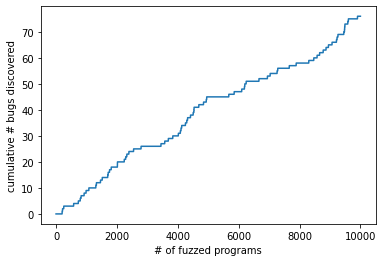

In [21]:
import matplotlib.pyplot as plt

plt.plot(
    np.arange(len(trial_results)),
    np.cumsum(trial_results)
)
plt.xlabel("# of fuzzed programs")
plt.ylabel("cumulative # bugs discovered")

In [27]:
from tqdm import tqdm
possible_statements = ['A', 'B', 'C', 'D', 'E']

def create_program(length):
    return "".join(np.random.choice(possible_statements, int(length)))


def is_program_buggy(program_under_test, buggy_programs):
    for buggy_program in buggy_programs:
        if buggy_program in program_under_test:
            return buggy_program
    return None

# CREATE FAULTY PROGRAMS
N_BUGGY_PROGRAMS = 20
buggy_programs = [
    create_program(length=10)
    for _ in range(N_BUGGY_PROGRAMS)
]

# FUZZ
FUZZ_BUDGET = 100000
MAX_PROGRAM_LENGTH = 30

trials = []

for i in tqdm(range(FUZZ_BUDGET)):
    new_program_test = create_program(
        length=np.random.choice(np.arange(MAX_PROGRAM_LENGTH), 1))
    bug_discovered = is_program_buggy(
        program_under_test=new_program_test, 
        buggy_programs=buggy_programs)
    if bug_discovered is not None: 
        buggy_programs.remove(bug_discovered)
        print(f"Bugs remained: {len(buggy_programs)}")
        
    if len(buggy_programs) == 0:
        break
    
    trial_success = 0 if bug_discovered is None else 1
    trials.append(trial_success)

print(len(trials))    

  8%|█████████▌                                                                                                          | 8259/100000 [00:00<00:07, 12970.79it/s]

Bugs remained: 19


 12%|██████████████▏                                                                                                    | 12379/100000 [00:00<00:06, 13518.15it/s]

Bugs remained: 18


 21%|███████████████████████▊                                                                                           | 20709/100000 [00:01<00:05, 13483.91it/s]

Bugs remained: 17
Bugs remained: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:06<00:00, 14345.09it/s]

100000
